Una vez calculados los mejores parámetros, vamos a ver qué es lo mejor que se puede hacer con cada uno de los datasets

In [1]:
from demo_utils.demo10 import Demo10
from demo_utils.hyper_params.join_all import my_join
from demo_utils.general import SUPPORTED_DATASETS
from IPython.display import Markdown as md

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#testing_dataset = 'segment'
#model_name = 'dt'
#sampler_name = 'nystroem'

testing_dataset = 'hola'
model_name = 'hola'
sampler_name = 'hola'
box_type = 'none'

In [5]:
h_param_name = {
    'dt': 'min_impurity_decrease',
    'logit': 'C',
    'linear_svc': 'C',
}

In [6]:
sampler_name_change = {
    'rbf': 'rff',
    'nystroem': 'nystroem'
}

In [7]:
d10_data = {
    'dts_name': testing_dataset,
    'dts_size': 1000,
    'features_range': (500, 501),
    'models': [{'model_name': model_name,
                'sampler_name': 'identity',
                'sampler_gamma': 1,
                #'box_type': 'none',
                'box_type': box_type,
                'n_estim': None,
                'pca': False,
                'pca_first': False},
              {'model_name': model_name,
                'sampler_name': 'identity',
               'sampler_gamma': 1,
                #'box_type': 'none',
                'box_type': box_type,
                'n_estim': None,
                'pca': True,
                'pca_first': False},
              {'model_name': model_name,
                'sampler_name': sampler_name,
                #'box_type': 'none',
                'box_type': box_type,
                'n_estim': None,
                'pca': False,
                'pca_first': False},
              {'model_name': model_name,
                'sampler_name': sampler_name,
                #'box_type': 'none',
                'box_type': box_type,
                'n_estim': None,
                'pca': True,
                'pca_first': True},
              {'model_name': model_name,
                'sampler_name': sampler_name,
                #'box_type': 'none',
                'box_type': box_type,
                'n_estim': None,
                'pca': True,
                'pca_first': False},],
    'rbfsampler_gamma': 1.0,
    'nystroem_gamma': 1.0,
    'hparams': {'dt': {'max_depth': None,
                       'min_samples_split': 2,
                       'min_samples_leaf': 1,
                       'min_weight_fraction_leaf': 0.0,
                       'max_leaf_nodes': None,
                       'min_impurity_decrease': 0.0},
                'logit': {'C': 1000.0},
                'linear_svc': {'C': 5}}
}


In [8]:
a = my_join()

spec = a[testing_dataset]
d10_data['dts_name'] = testing_dataset
for i in range(5):
    d10_data['models'][i]['model_name'] = model_name
for i in range(2,5):
    d10_data['models'][i]['sampler_name'] = sampler_name
d10_data['models'][0]['model_params'] = spec[model_name]['no_sampler']['no_pca']
d10_data['models'][1]['model_params'] = spec[model_name]['no_sampler']['pca']

gg = {h_param_name[model_name]: 1}

gg[h_param_name[model_name]] = spec[model_name][sampler_name]['no_pca'][h_param_name[model_name]]
d10_data['models'][2]['model_params'] = gg
d10_data['models'][2]['sampler_gamma'] = spec[model_name][sampler_name]['no_pca']['gamma']

gg[h_param_name[model_name]] = spec[model_name][sampler_name]['pca_first'][h_param_name[model_name]]
d10_data['models'][3]['model_params'] = gg
d10_data['models'][3]['sampler_gamma'] = spec[model_name][sampler_name]['pca_first']['gamma']

gg[h_param_name[model_name]] = spec[model_name][sampler_name]['pca_last'][h_param_name[model_name]]
d10_data['models'][4]['model_params'] = gg
d10_data['models'][4]['sampler_gamma'] = spec[model_name][sampler_name]['pca_last']['gamma']

In [10]:
def test_sampler(testing_dataset, sampler_name):
    spec_sampler_name = sampler_name_change[sampler_name]
    #model_name = 'dt'
    for model_name in h_param_name:
        spec = a[testing_dataset]
        d10_data['dts_name'] = testing_dataset
        for i in range(5):
            d10_data['models'][i]['model_name'] = model_name
        for i in range(2,5):
            d10_data['models'][i]['sampler_name'] = sampler_name
        d10_data['models'][0]['model_params'] = spec[model_name]['no_sampler']['no_pca']
        d10_data['models'][1]['model_params'] = spec[model_name]['no_sampler']['pca']

        gg = {h_param_name[model_name]: 1}

        gg[h_param_name[model_name]] = spec[model_name][spec_sampler_name]['no_pca'][h_param_name[model_name]]
        d10_data['models'][2]['model_params'] = gg
        d10_data['models'][2]['sampler_gamma'] = spec[model_name][spec_sampler_name]['no_pca']['gamma']

        gg[h_param_name[model_name]] = spec[model_name][spec_sampler_name]['pca_first'][h_param_name[model_name]]
        d10_data['models'][3]['model_params'] = gg
        d10_data['models'][3]['sampler_gamma'] = spec[model_name][spec_sampler_name]['pca_first']['gamma']

        gg[h_param_name[model_name]] = spec[model_name][spec_sampler_name]['pca_last'][h_param_name[model_name]]
        d10_data['models'][4]['model_params'] = gg
        d10_data['models'][4]['sampler_gamma'] = spec[model_name][spec_sampler_name]['pca_last']['gamma']

        d.non_interactive(**d10_data)

test_sampler('segment', 'rbf')

In [11]:
def test_dataset(dts_name):
    display(md('## rbf'))
    test_sampler(dts_name, 'rbf')
    display(md('## nystroem'))
    test_sampler(dts_name, 'nystroem')

test_dataset('segment')

In [12]:
d = Demo10()

# segment

## rbf

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: segment'), HTML(value=…

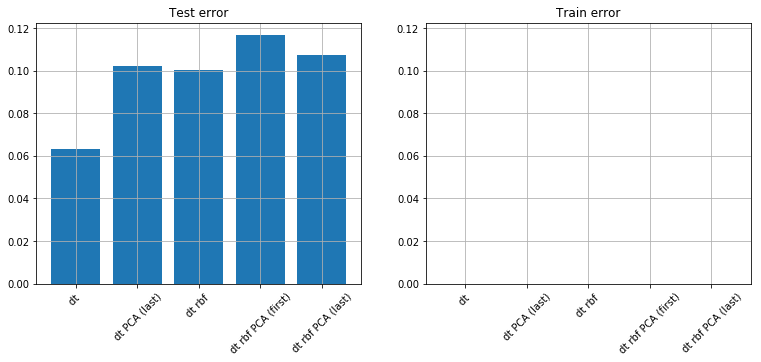

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: segment'), HTML(value=…

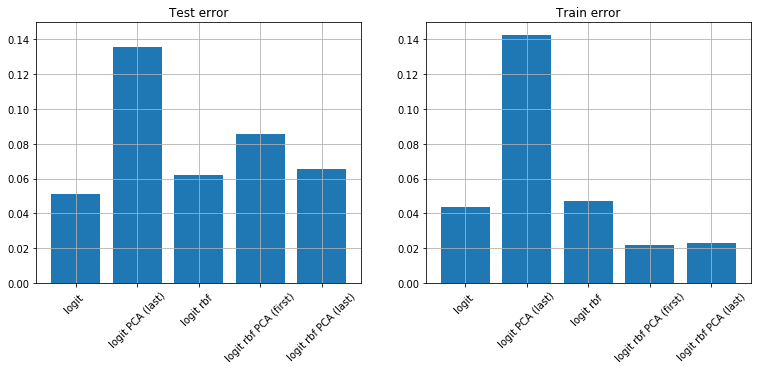

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: segment'), HTML(value=…

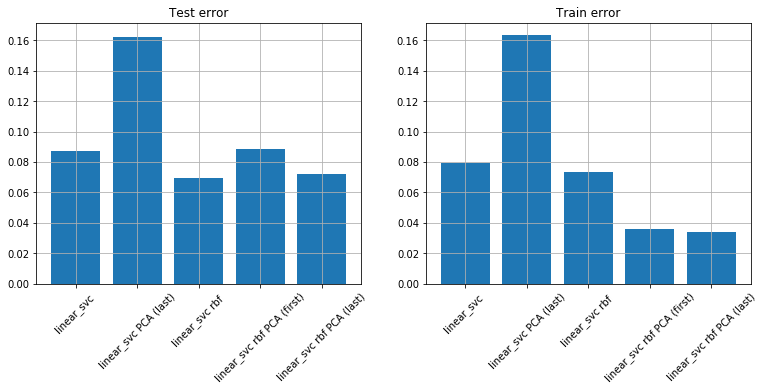

## nystroem

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: segment'), HTML(value=…

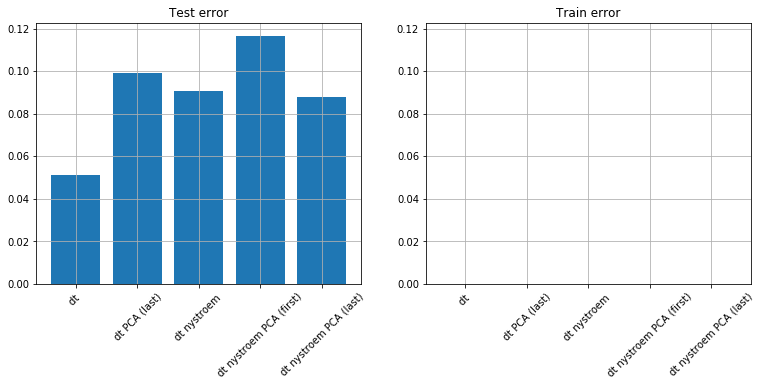

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: segment'), HTML(value=…

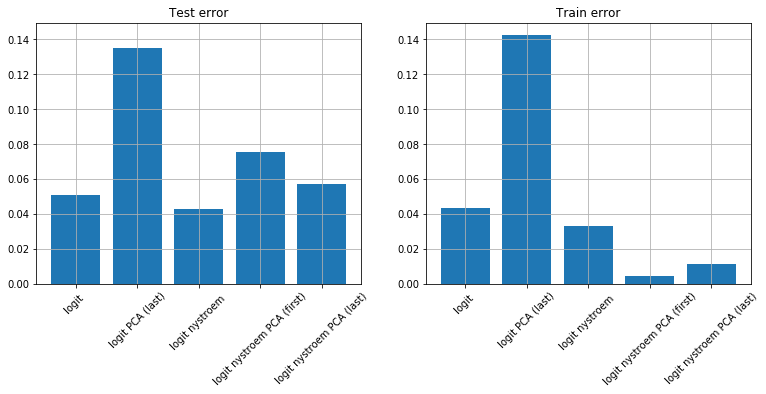

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: segment'), HTML(value=…

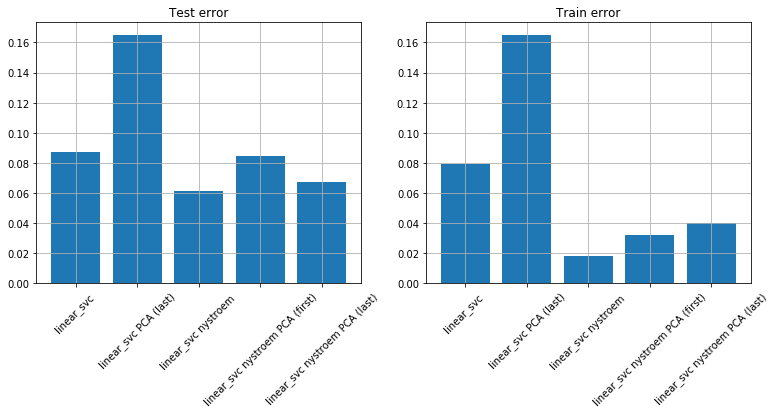

# covertype

## rbf

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: covertype'), HTML(valu…

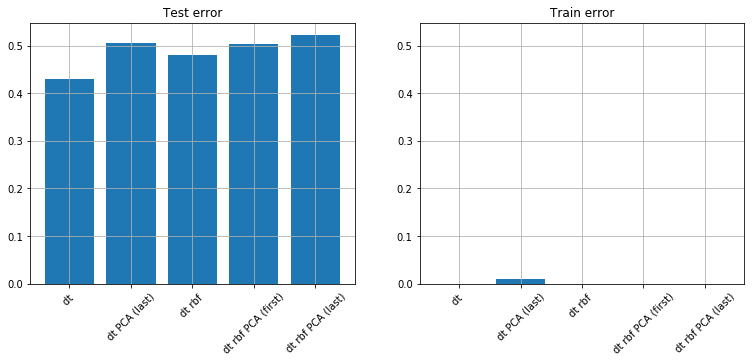

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: covertype'), HTML(valu…

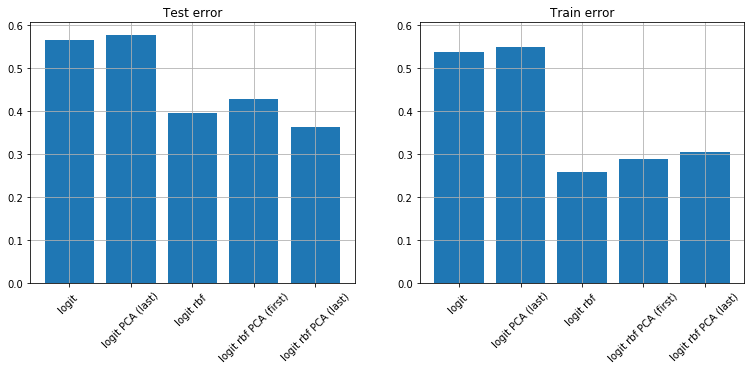

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: covertype'), HTML(valu…

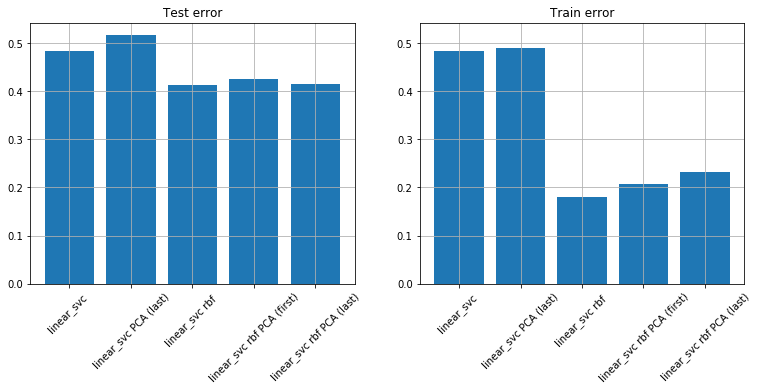

## nystroem

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: covertype'), HTML(valu…

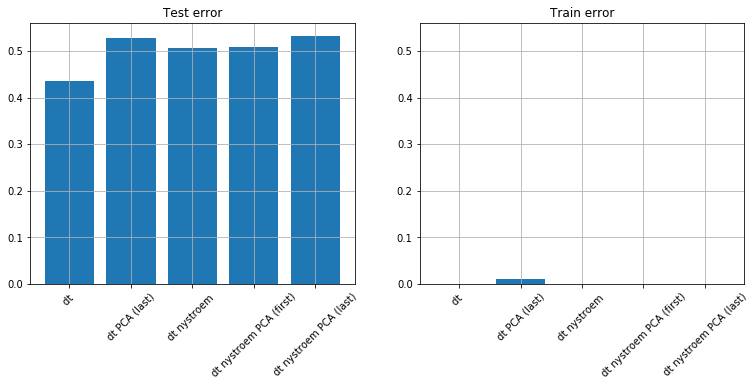

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: covertype'), HTML(valu…

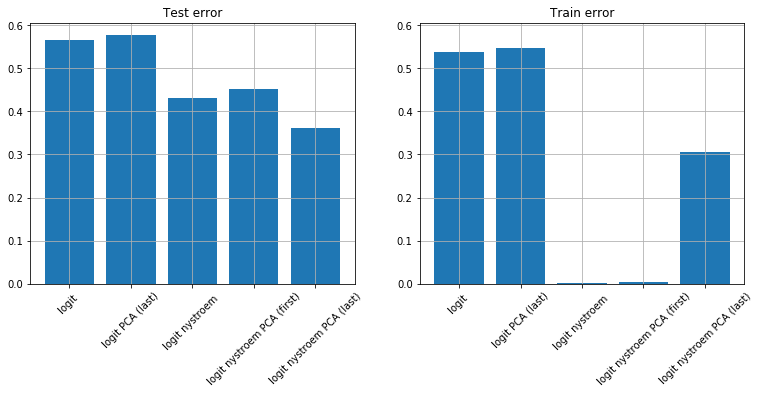

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: covertype'), HTML(valu…

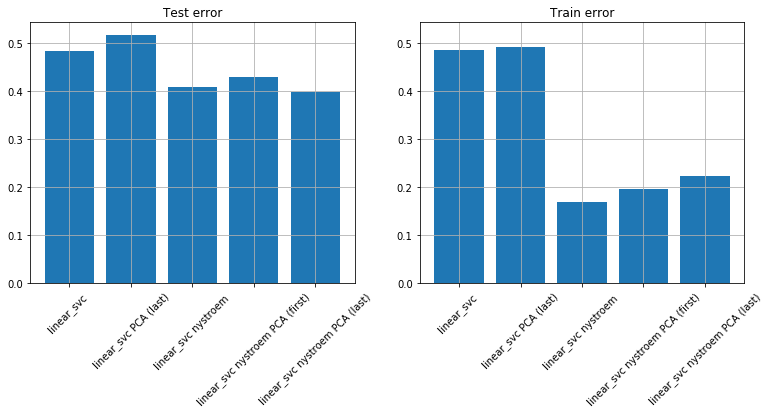

# digits

## rbf

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: digits'), HTML(value='…

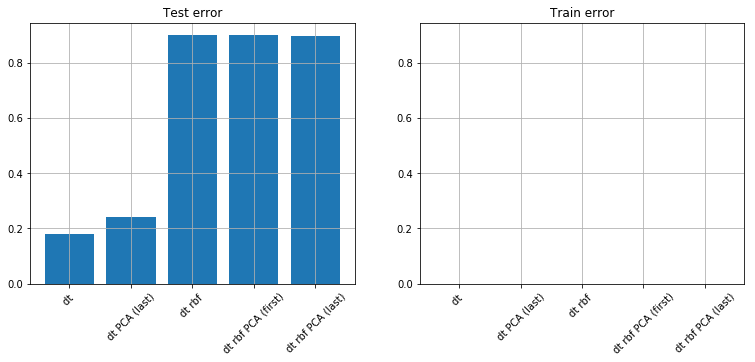

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: digits'), HTML(value='…

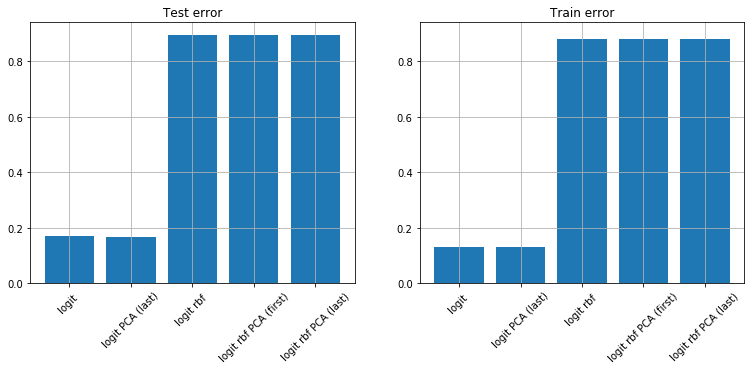

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: digits'), HTML(value='…

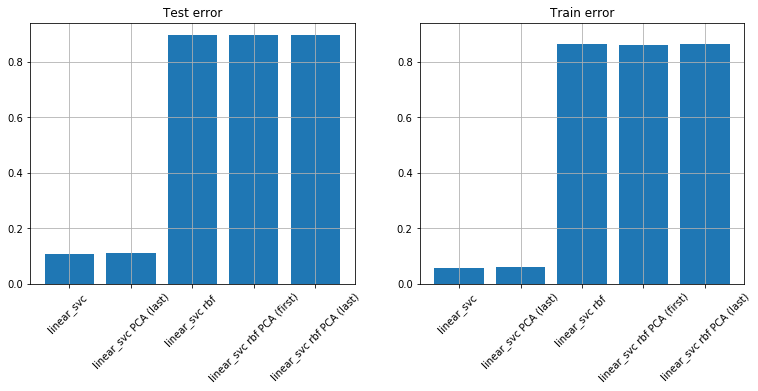

## nystroem

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: digits'), HTML(value='…

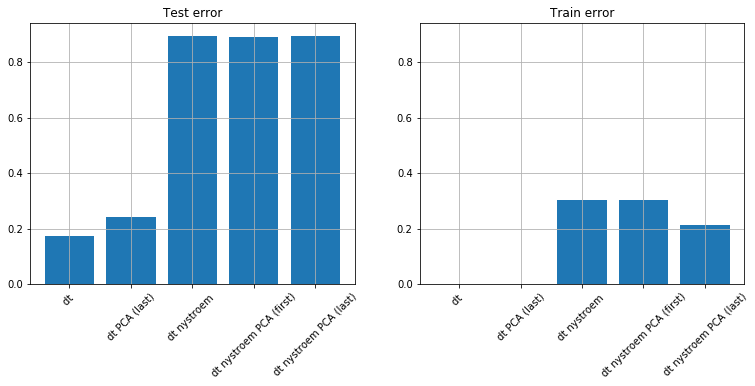

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: digits'), HTML(value='…

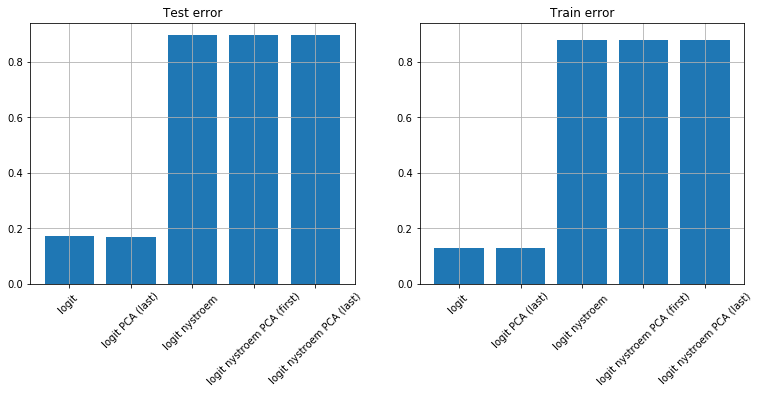

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: digits'), HTML(value='…

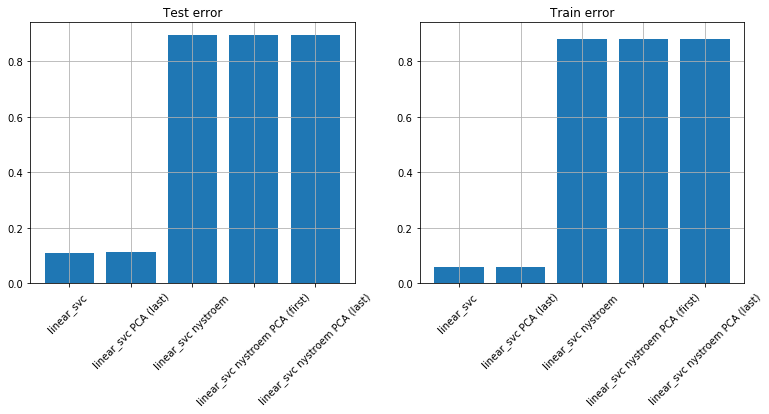

# fall_detection

## rbf

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: fall_detection'), HTML…

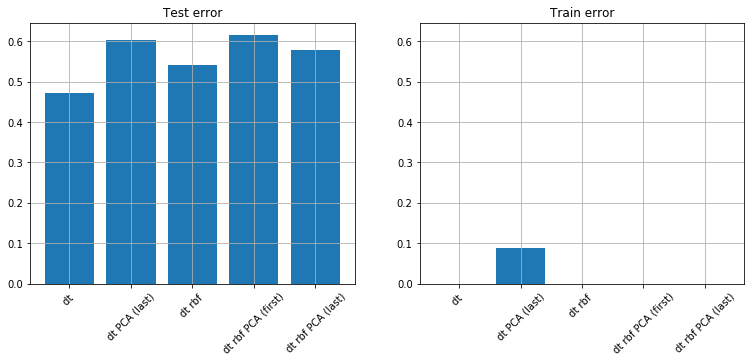

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: fall_detection'), HTML…

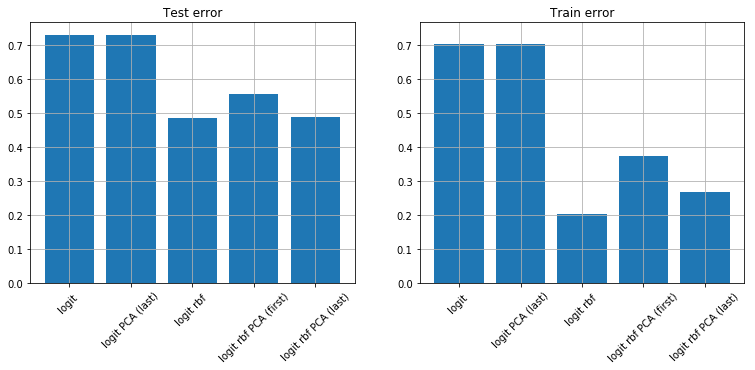

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: fall_detection'), HTML…

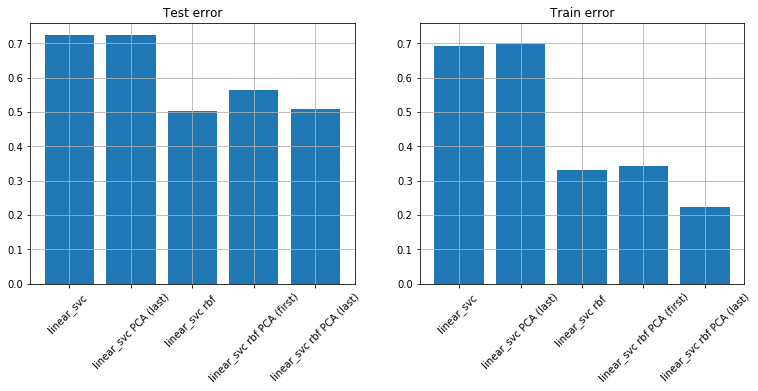

## nystroem

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: fall_detection'), HTML…

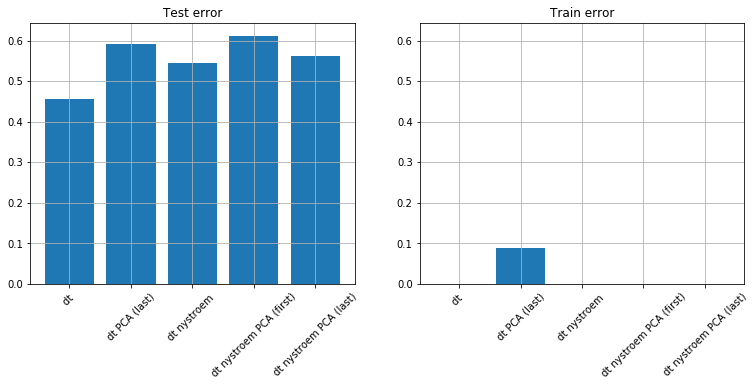

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: fall_detection'), HTML…

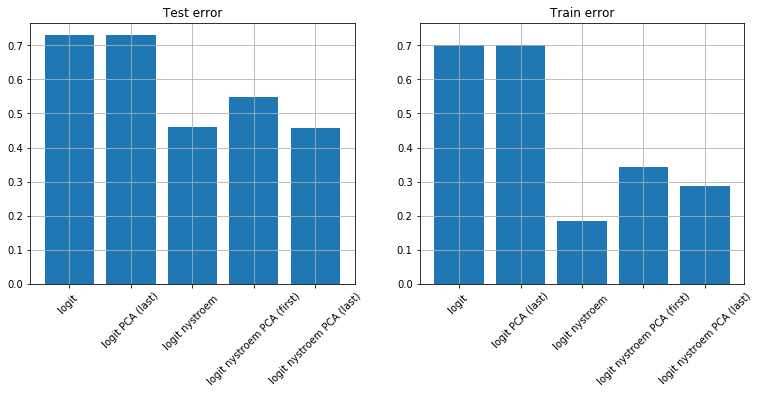

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: fall_detection'), HTML…

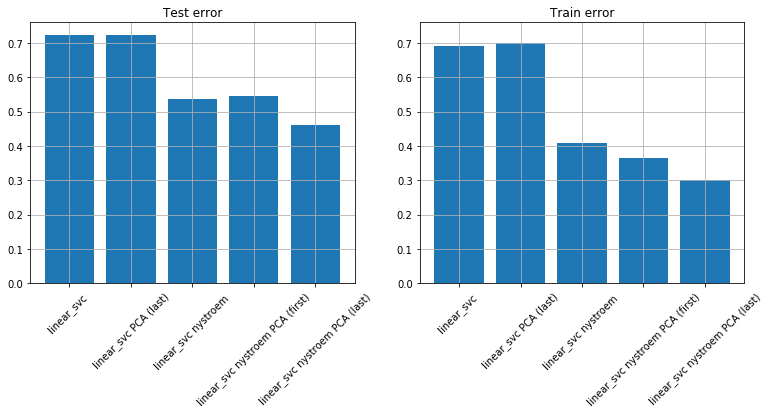

# mnist

## rbf

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: mnist'), HTML(value='<…

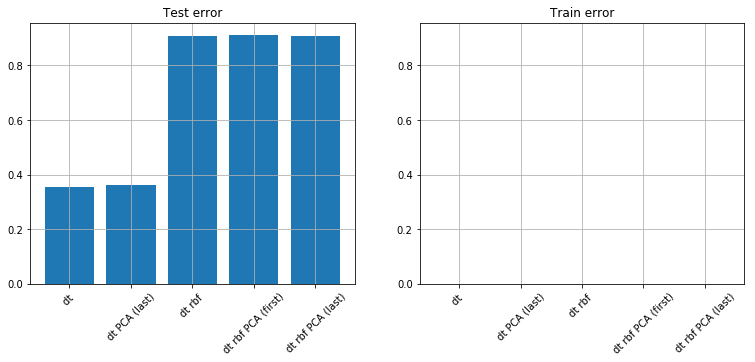

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: mnist'), HTML(value='<…

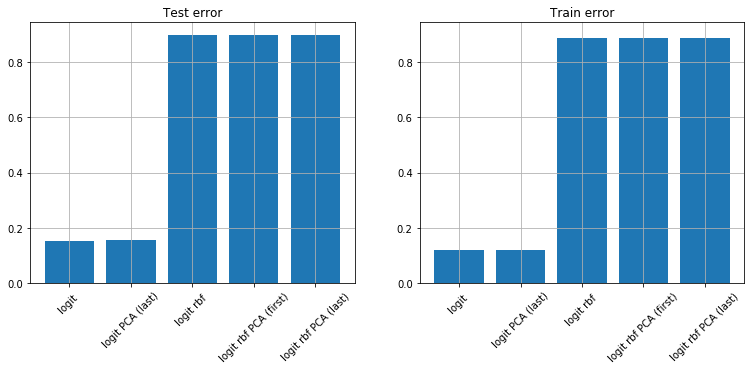

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: mnist'), HTML(value='<…

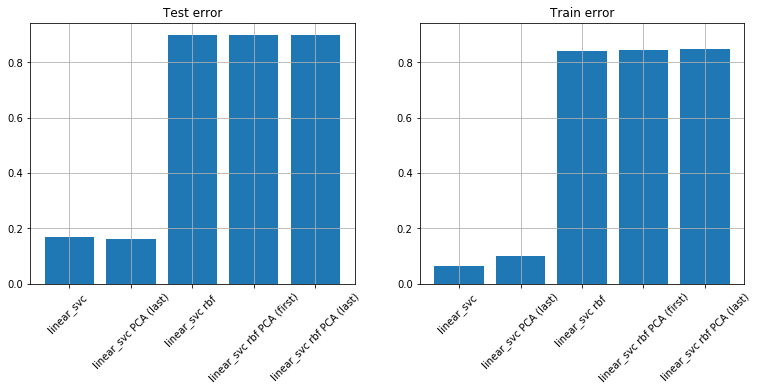

## nystroem

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: mnist'), HTML(value='<…

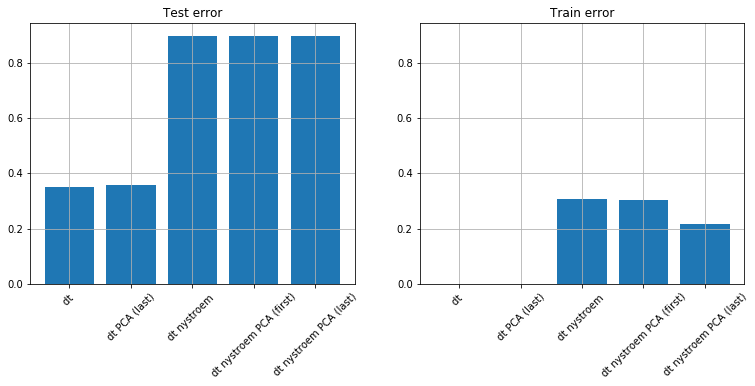

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: mnist'), HTML(value='<…

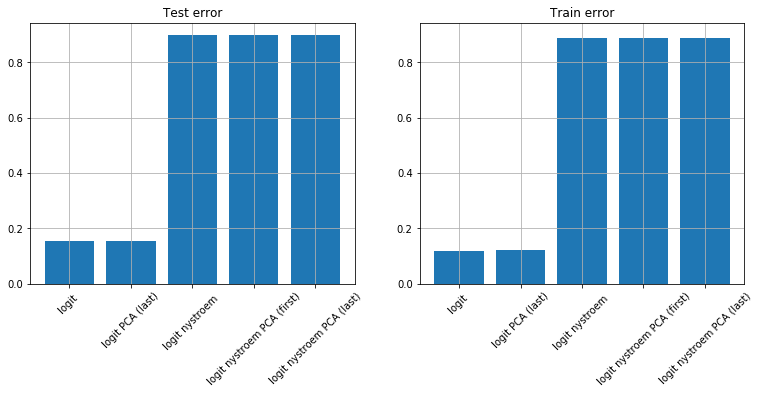

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: mnist'), HTML(value='<…

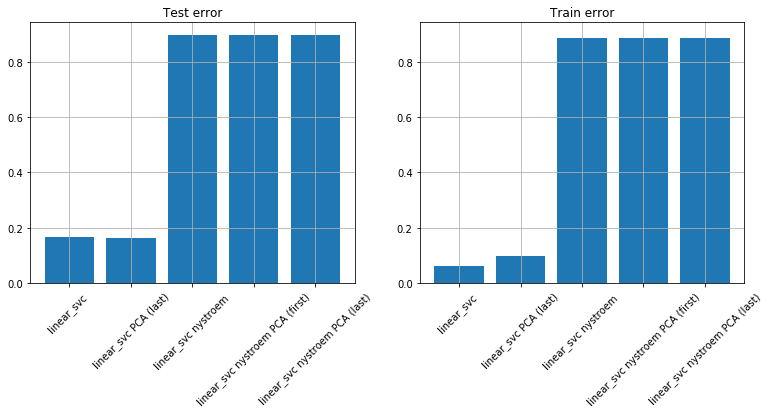

# pen_digits

## rbf

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: pen_digits'), HTML(val…

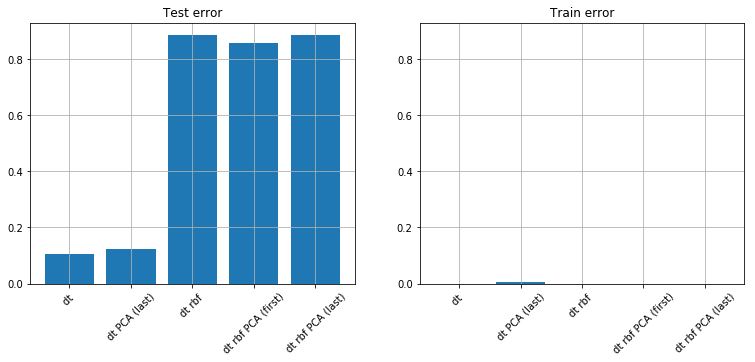

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: pen_digits'), HTML(val…

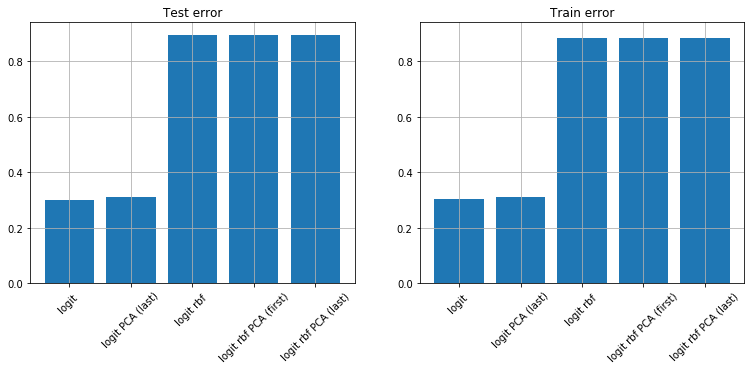

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: pen_digits'), HTML(val…

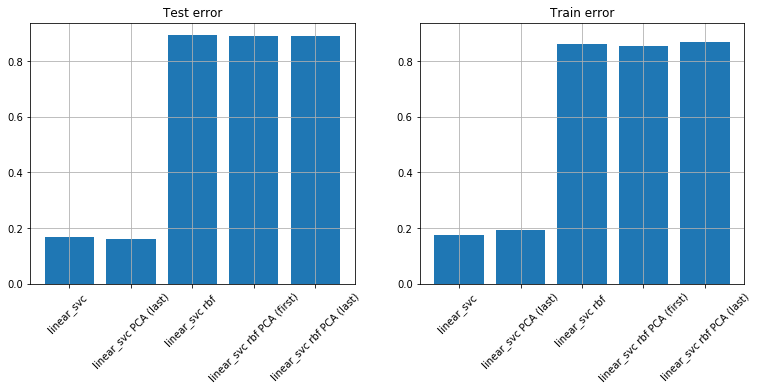

## nystroem

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: pen_digits'), HTML(val…

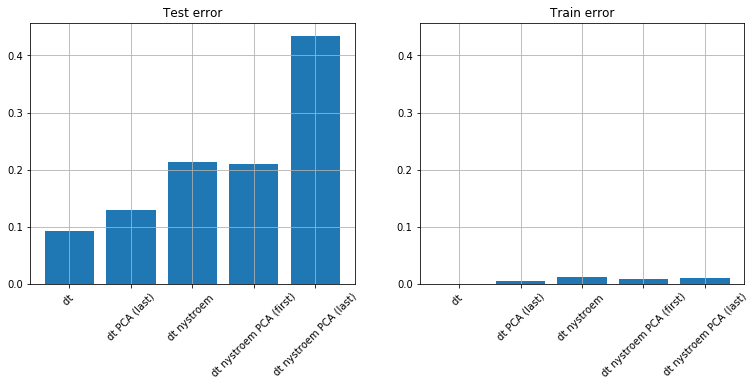

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: pen_digits'), HTML(val…

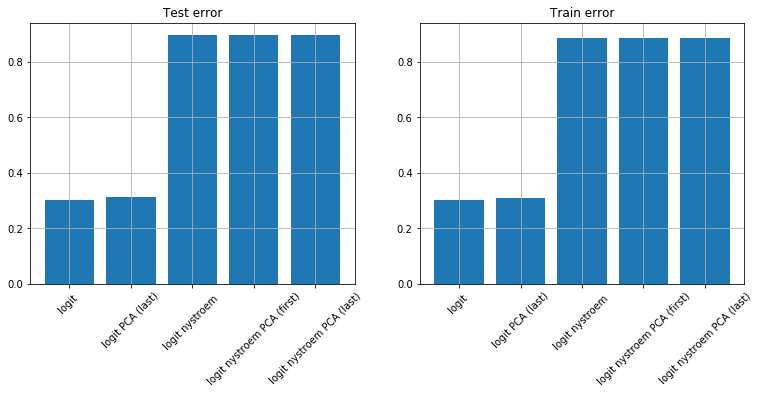

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: pen_digits'), HTML(val…

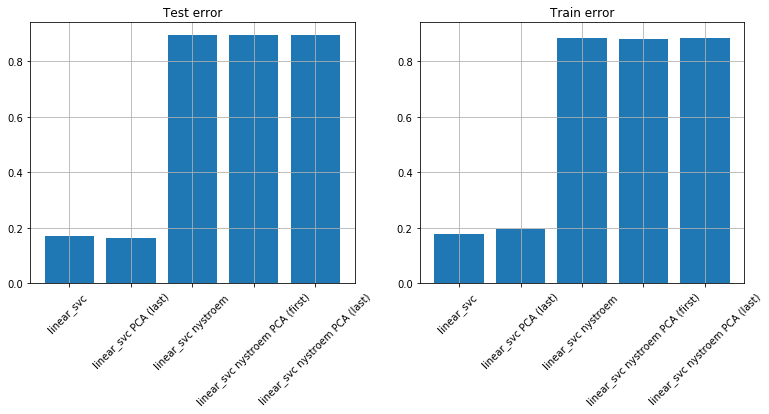

# satellite

## rbf

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: satellite'), HTML(valu…

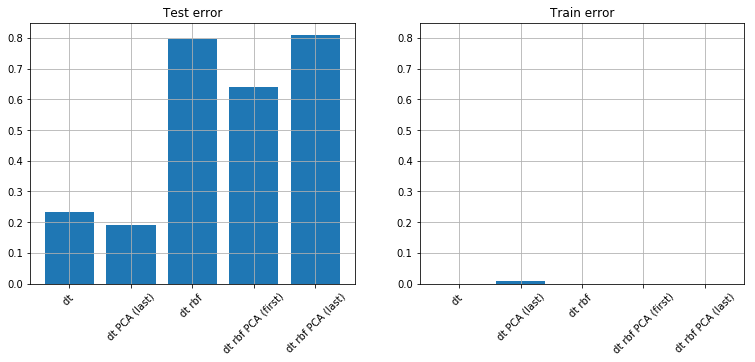

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: satellite'), HTML(valu…

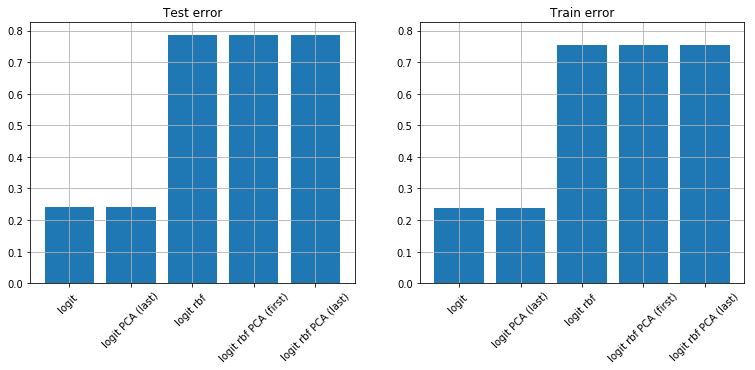

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: satellite'), HTML(valu…

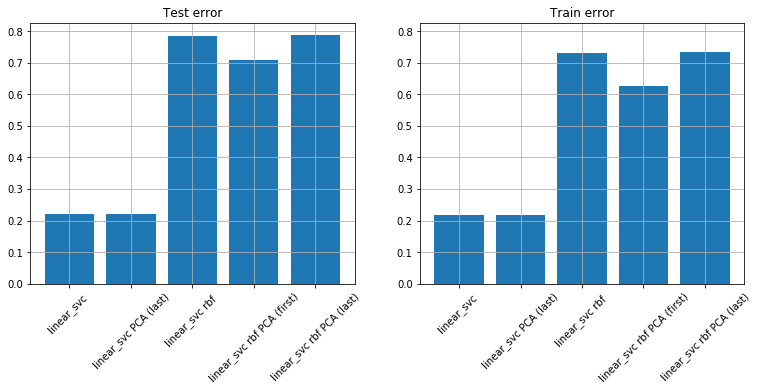

## nystroem

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: satellite'), HTML(valu…

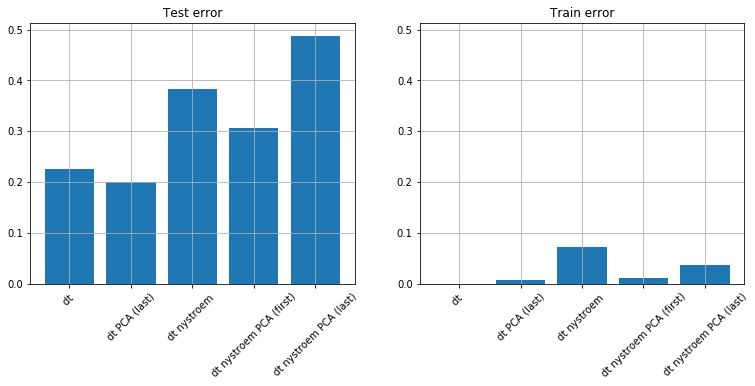

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: satellite'), HTML(valu…

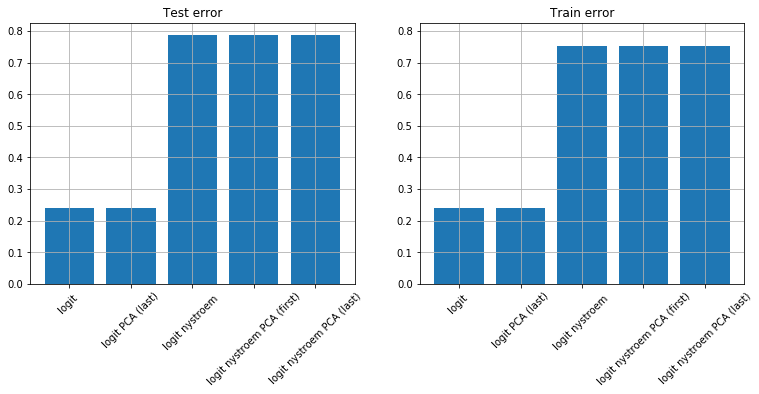

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: satellite'), HTML(valu…

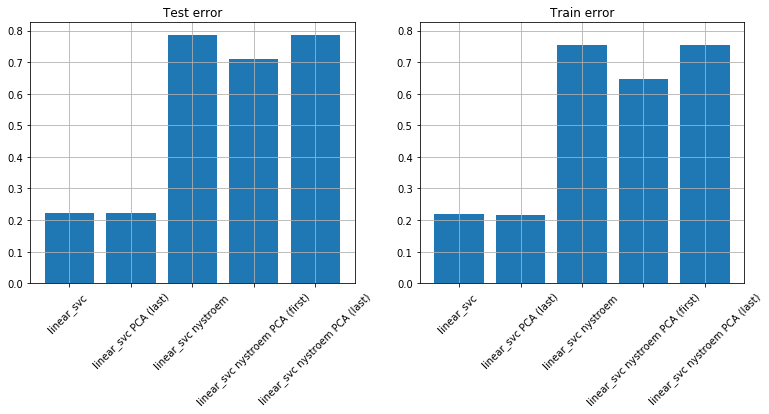

# vowel

## rbf

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: vowel'), HTML(value='<…

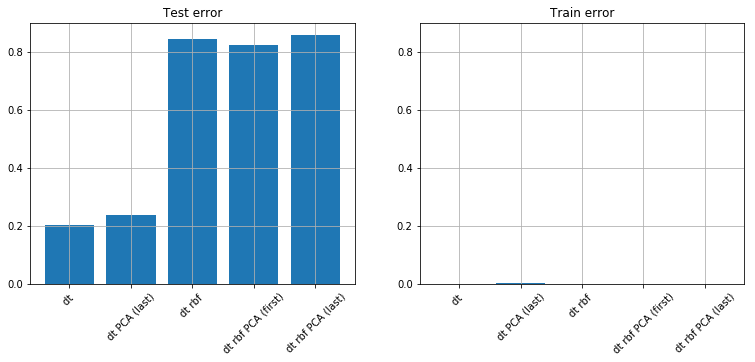

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: vowel'), HTML(value='<…

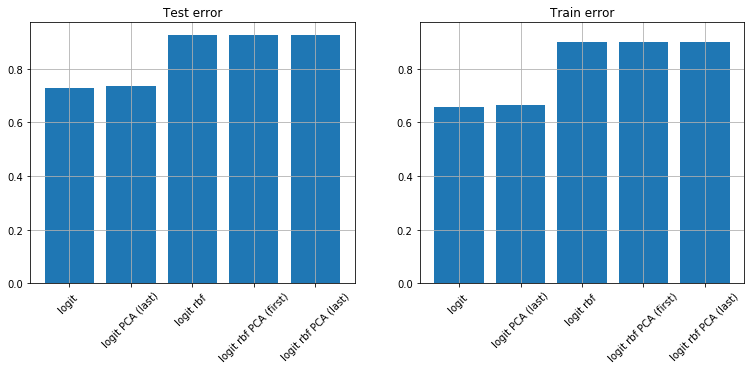

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: vowel'), HTML(value='<…

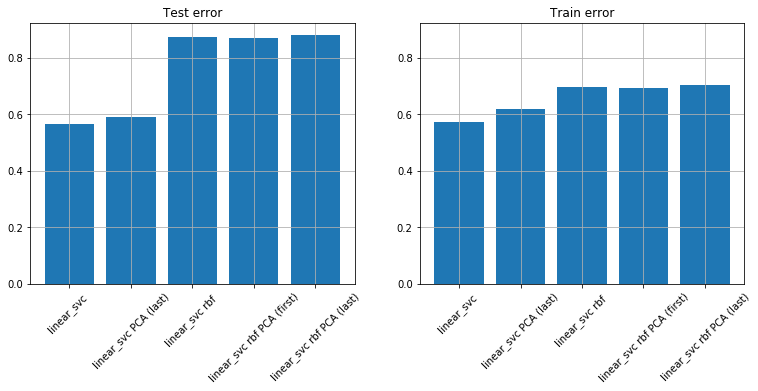

## nystroem

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: vowel'), HTML(value='<…

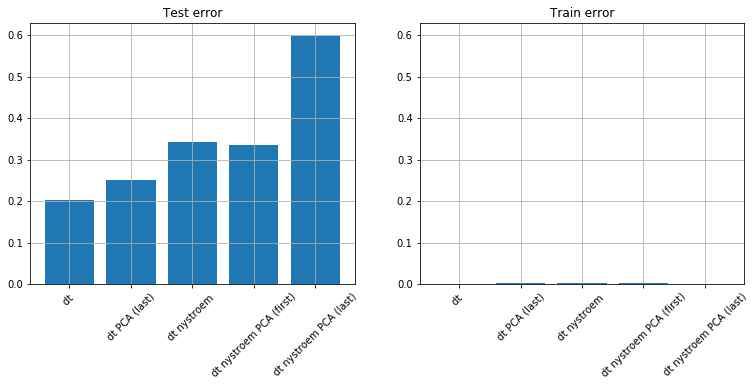

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: vowel'), HTML(value='<…

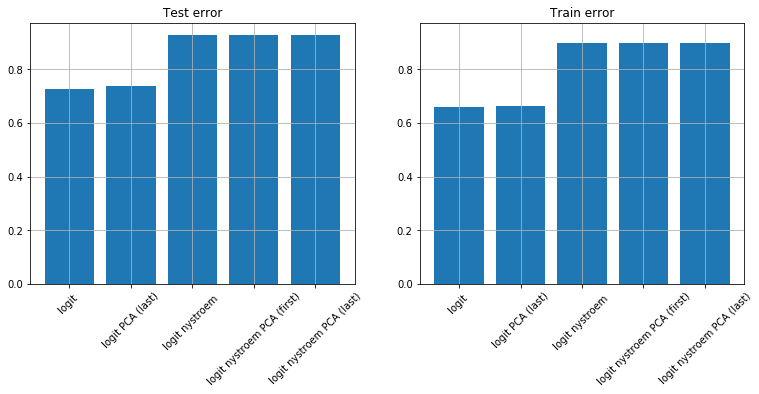

### Demo genérica v10

Accordion(children=(HBox(children=(VBox(children=(HTML(value='<strong>Dataset</strong>: vowel'), HTML(value='<…

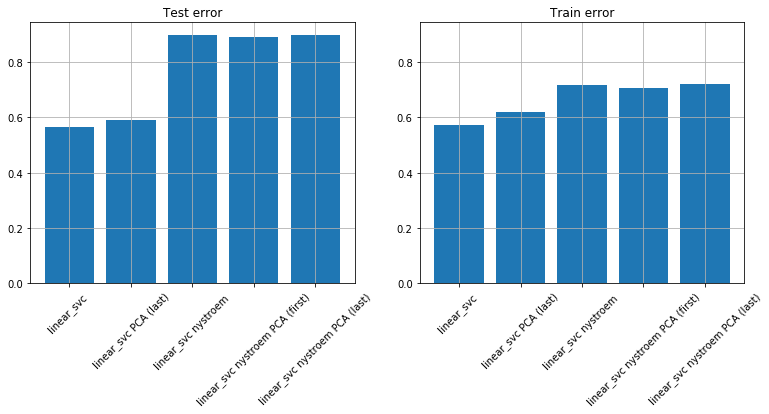

In [13]:
for sd in SUPPORTED_DATASETS:
    display(md('# ' + sd))
    test_dataset(sd)